<a href="https://colab.research.google.com/github/sangwainupur/breast_cancer_prediction/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dependencies**



In [ ]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
#import mpld3 as mpl


In [ ]:
'''! pip install -q kaggle
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle competitions download -c breast-cancer-prediction
'''

'! pip install -q kaggle\nfrom google.colab import files\nfiles.upload()\n'

Data Collection and Processing

In [ ]:
#loading data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#loading data to a data frame
#we loaded the dataset from sklearn numpy array to aa pandas dataframe

data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)


In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
#last 5 rows
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#no of rows and columns in the dataset
data_frame.shape

(569, 31)

In [ ]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [ ]:
data_frame.nunique()

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
label                        2
dtype: int64

In [ ]:
#getting some info about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#checking for missing values
#cleaning the data
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
#statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


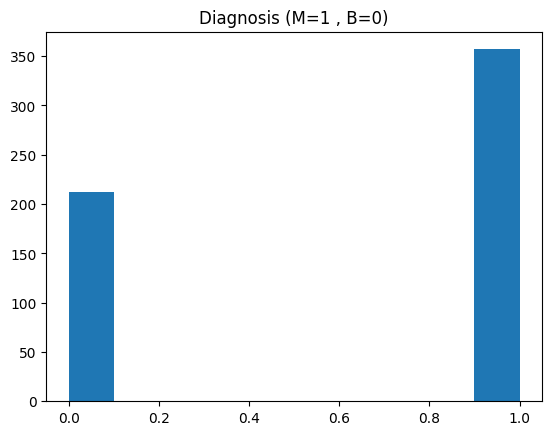

In [ ]:
#data_frame['mean perimeter'].unique()
plt.hist(data_frame['label'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

In [ ]:
#checking the distribution of target variable
#0 - malignant, 1 - benign
data_frame['label'].value_counts()


1    357
0    212
Name: label, dtype: int64

In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [ ]:
features_mean=list(data_frame.columns[0:10])
# split dataframe into two based on diagnosis
dfM=data_frame[data_frame['label'] ==1]
dfB=data_frame[data_frame['label'] ==0]


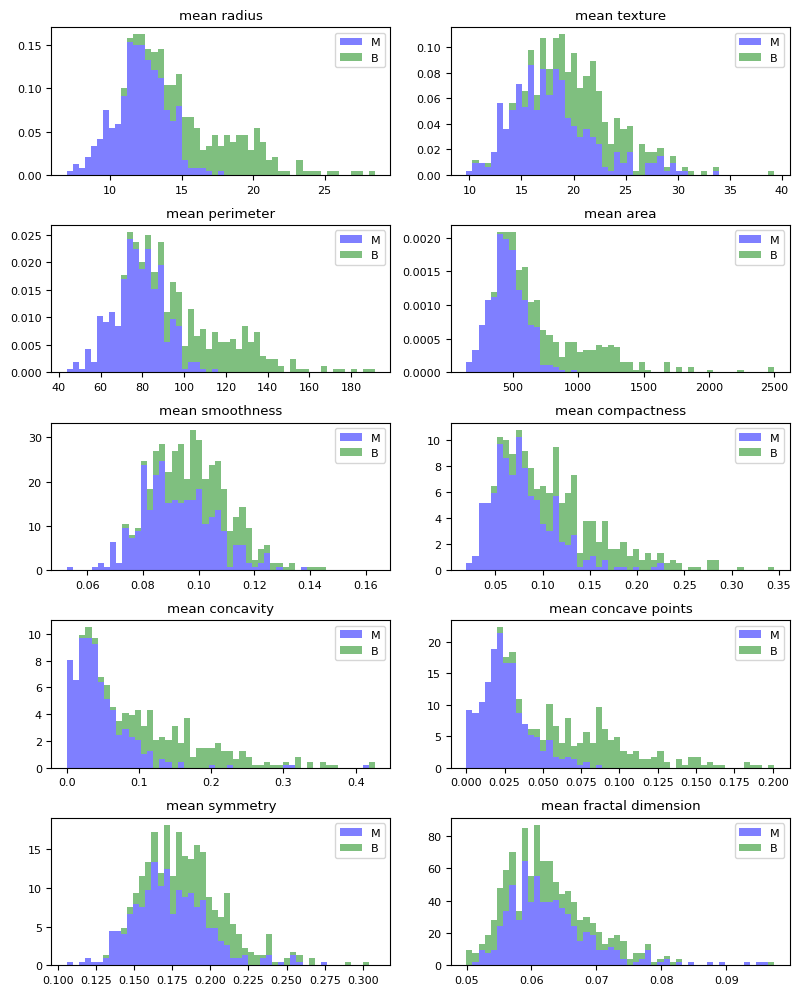

In [ ]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
#This line flattens the 5x2 grid of subplots into a 1D array of subplots so that we can easily iterate over them
for idx,ax in enumerate(axes):
  ax.figure
  binwidth= (max(data_frame[features_mean[idx]]) - min(data_frame[features_mean[idx]]))/50
  ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data_frame[features_mean[idx]]), max(data_frame[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density=True, label=['M','B'],color=['b','g'])
  ax.legend(loc='upper right')
  ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

1. Based on the histograms, where we can observe that for several features (radius, perimeter, area, compactness, concavity, and concave points), the distribution of malignant (M) cases (represented in red) tends to have higher values compared to benign (B) cases.
2. Mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.


 The observations imply that the mean values of certain features (cell radius, perimeter, area, compactness, concavity, and concave points) are potentially useful for distinguishing between malignant and benign tumors

Separating the features and target

In [ ]:
#label is target
#removing the 31st column
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [ ]:
correlation = data_frame.corr()

<Axes: >

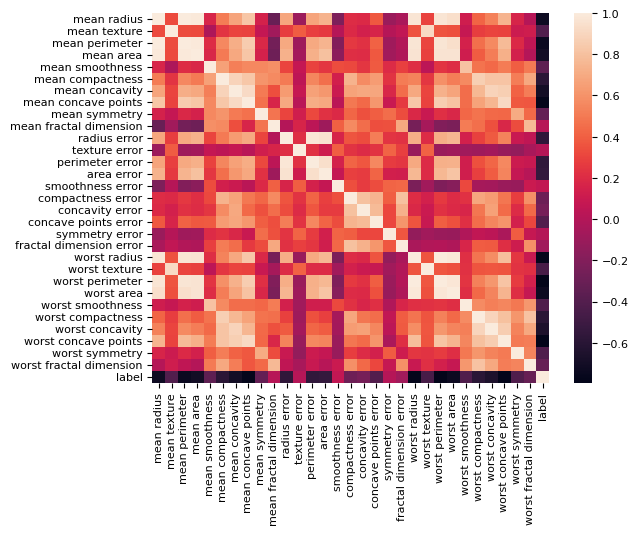

In [ ]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = False)

Label is less correlated so we can drop this column.




In [ ]:
#When we only want to visualize the relationship between two variables, could be cont. or categorical boolean,
#sns.pairplot(a)

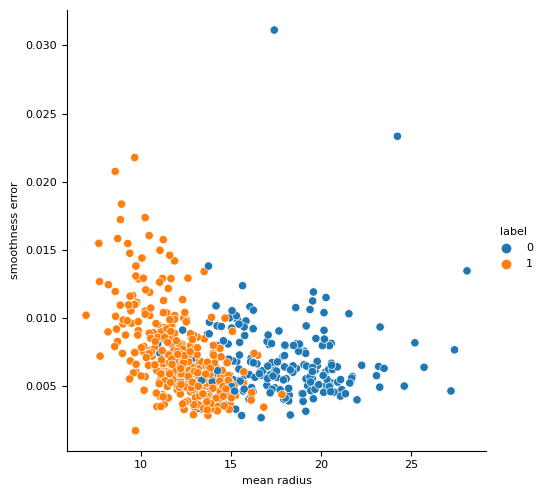

In [ ]:
#Scatter plot
sns.relplot(x = 'mean radius', y= 'smoothness error', hue = 'label', data = data_frame)

<Axes: xlabel='mean area', ylabel='Count'>

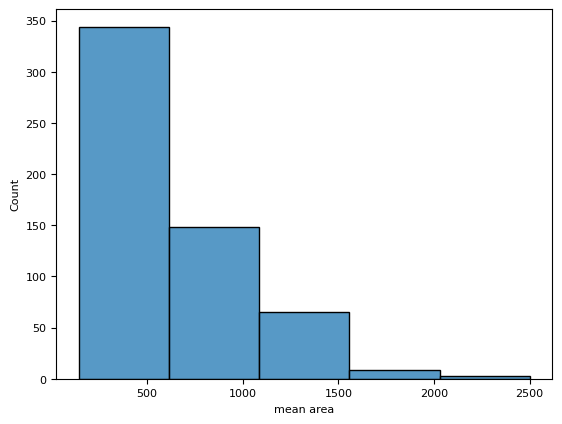

In [ ]:
#Histogram
sns.histplot(data_frame['mean area'], bins=5)

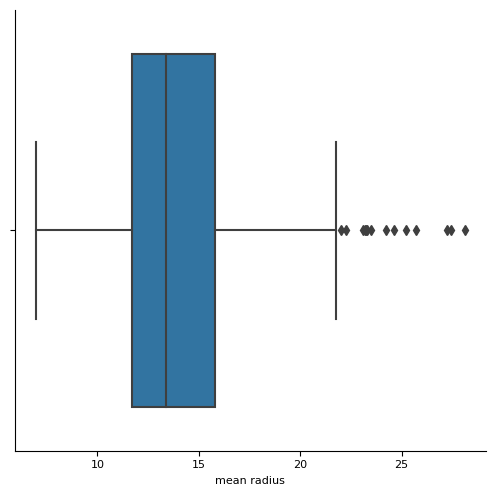

In [ ]:
sns.catplot(x='mean radius', kind = 'box', data = data_frame)

Splitting the data into training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
# 20% is test data so 0.2
# random_state = way of splitting the data
# no () for tuple datatype

In [ ]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#comparing true value and predicted value

In [ ]:
traindf, testdf = train_test_split(data_frame, test_size = 0.3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [ ]:
print(data_frame['label'])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Model training

Logistic regression

In [ ]:
model = LogisticRegression()
#training the logistic regression model using training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])

  #Make predictions on training set:
  predictions = model.predict(data[predictors])

  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    train_predictors = (data[predictors].iloc[train,:])

    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]

    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)

    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print("Cross-Validation accuracy : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])


predictor_var = ['mean radius','mean perimeter','mean area','mean compactness','mean concave points']
outcome_var='label'
model=LogisticRegression()
classification_model(model,traindf ,predictor_var,outcome_var)

Accuracy : 89.196%
Cross-Validation accuracy : 85.000%
Cross-Validation accuracy : 88.125%
Cross-Validation accuracy : 88.750%
Cross-Validation accuracy : 88.081%
Cross-Validation accuracy : 89.199%


In [ ]:
predictor_var = ['mean radius','mean perimeter','mean area','mean compactness','mean concave points']
outcome_var='label'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 89.196%
Cross-Validation accuracy : 85.000%
Cross-Validation accuracy : 88.125%
Cross-Validation accuracy : 88.750%
Cross-Validation accuracy : 88.081%
Cross-Validation accuracy : 89.199%


In [ ]:
predictor_var = ['mean radius']
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 86.683%
Cross-Validation accuracy : 81.250%
Cross-Validation accuracy : 84.375%
Cross-Validation accuracy : 85.000%
Cross-Validation accuracy : 84.953%
Cross-Validation accuracy : 86.949%


Decision Tree

In [ ]:
predictor_var = ['mean radius','mean perimeter','mean area','mean compactness','mean concave points']
outcome_var='label'
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation accuracy : 92.500%
Cross-Validation accuracy : 90.625%
Cross-Validation accuracy : 90.417%
Cross-Validation accuracy : 89.648%
Cross-Validation accuracy : 88.934%


In [ ]:
predictor_var = ['mean radius']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 96.231%
Cross-Validation accuracy : 75.000%
Cross-Validation accuracy : 77.500%
Cross-Validation accuracy : 77.083%
Cross-Validation accuracy : 77.116%
Cross-Validation accuracy : 78.655%


Here, accuracy is good, but cross validation is not that great

In [ ]:
predictor_var = ['mean concave points']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation accuracy : 81.250%
Cross-Validation accuracy : 83.750%
Cross-Validation accuracy : 83.750%
Cross-Validation accuracy : 84.331%
Cross-Validation accuracy : 84.174%


In [ ]:
predictor_var = ['mean perimeter']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 98.492%
Cross-Validation accuracy : 80.000%
Cross-Validation accuracy : 82.500%
Cross-Validation accuracy : 81.250%
Cross-Validation accuracy : 80.241%
Cross-Validation accuracy : 78.623%


Random Forest

In [ ]:
predictor_var = ['mean radius','mean perimeter','mean area','mean compactness','mean concave points']
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 94.472%
Cross-Validation accuracy : 91.250%
Cross-Validation accuracy : 90.625%
Cross-Validation accuracy : 91.250%
Cross-Validation accuracy : 90.273%
Cross-Validation accuracy : 91.459%


Using all the features improves the prediction accuracy and the cross-validation score is great.

✅


**FIND THE MATHS BEHIND FEATURE IMPORTANCES**

Grid cv - read stacking

cad boost

XG boost


In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

mean concave points    0.316951
mean area              0.285263
mean radius            0.191387
mean perimeter         0.166468
mean compactness       0.039932
dtype: float64


Now, we use the top five features

In [ ]:
predictor_var = ['mean concave points','mean area', 'mean perimeter','mean concavity','mean radius']
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 94.975%
Cross-Validation accuracy : 91.250%
Cross-Validation accuracy : 92.500%
Cross-Validation accuracy : 92.083%
Cross-Validation accuracy : 90.898%
Cross-Validation accuracy : 90.693%


Using the top 5 features only changes the prediction accuracy a bit but I think we get a better result if we use all the predictors.

In [ ]:
predictor_var =  ['mean radius']
model = RandomForestClassifier(n_estimators=100)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 96.231%
Cross-Validation accuracy : 78.750%
Cross-Validation accuracy : 80.000%
Cross-Validation accuracy : 79.583%
Cross-Validation accuracy : 78.991%
Cross-Validation accuracy : 81.168%


Using on test data

In [ ]:
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, testdf,predictor_var,outcome_var)

Accuracy : 95.322%
Cross-Validation accuracy : 94.286%
Cross-Validation accuracy : 91.261%
Cross-Validation accuracy : 92.213%
Cross-Validation accuracy : 92.689%
Cross-Validation accuracy : 91.798%


In [ ]:
a = model.coef_
a = list(a)
len(a[0])

30

Model Evaluation


Accuracy Score

In [ ]:
#print(model.summary)

Model classification


In [ ]:
# accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
#comparing true value and predicted value

In [ ]:
print(training_data_accuracy)

0.9472527472527472


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print(test_data_accuracy)

0.9298245614035088


training accuracy high, test very low  -  overfit


Building a predictive system

In [ ]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

In [ ]:
# change the input data from a tuple to a numpy array
input_data_as_numpyarray = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpyarray.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print('The Breast cancer is Malignant')
else:
  print('The Breast cancer is Benign')

[1]
The Breast cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
